## Displot

The displot is a plot type that can show you the distribution of a single feature.
This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots.

<i>seaborn.displot(data=None, x=None, y=None, hue=None, rug=False)

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Final_Four 2020-2021.csv')

In [3]:
df.head()

,Player,Club,Number,Position,Country,Age,Height,Games,Minutes,Points,Rebounds,Assists,Steals,Turnovers,Blocks
0,Adam Hanga,FC Barcelona,8,Forward,Hungary,31,200,41,652,190,90,69,32,48,11
1,Adrien Moerman,Anadolu Efes,18,Forward,France,32,202,41,841,263,189,45,24,39,6
2,Alex Abrines,FC Barcelona,21,Forward,Spain,27,198,39,730,237,72,26,22,13,8
3,Alexander Khomenko,CSKA Moscow,4,Guard,Russia,21,192,16,100,32,4,4,0,8,0
4,Andrea Cinciarini,AX Armani Exchange Milan,20,Guard,Italy,34,193,8,19,0,2,2,0,2,0


In [4]:
df.shape

(66, 15)

In [5]:
sns.set_style('white')

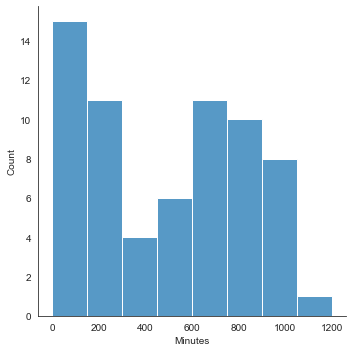

In [10]:
sns.displot(x='Minutes', data=df);

# sns.displot(df['Minutes'])

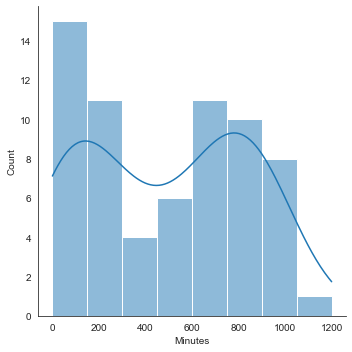

In [11]:
# kde

sns.displot(x='Minutes', data=df, kde=True);

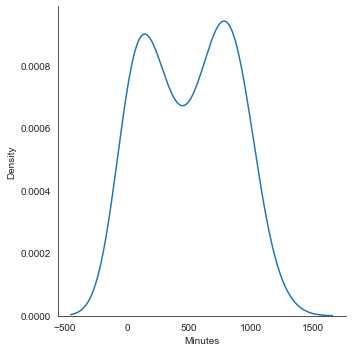

In [12]:
# kind

sns.displot(x='Minutes', data=df, kind='kde');  # kde : kernel density estimation

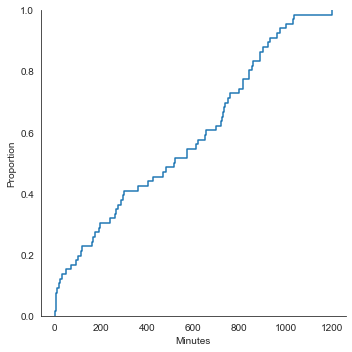

In [13]:
sns.displot(x='Minutes', data=df, kind='ecdf');  # ecdf : empirical cumulative distribution function

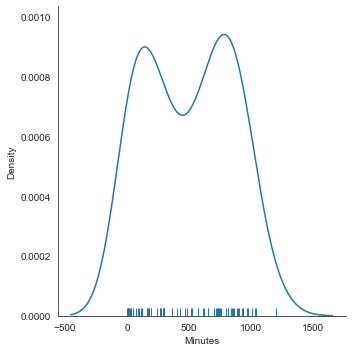

In [14]:
# rug

sns.displot(x='Minutes', data=df, kind='kde', rug=True);

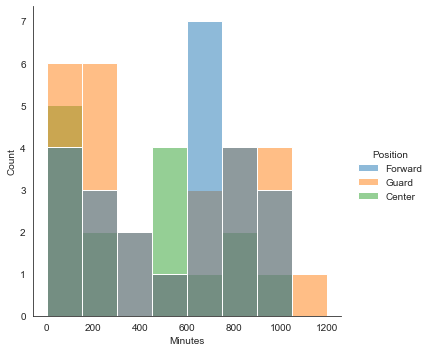

In [15]:
# categorical variables : hue

sns.displot(x='Minutes', data=df, hue='Position');

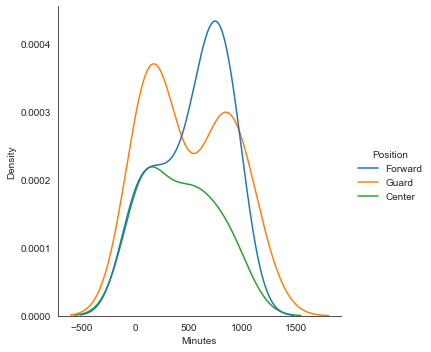

In [16]:
sns.displot(x='Minutes', data=df, kind='kde', hue='Position');

## Bivariate (2D) Options

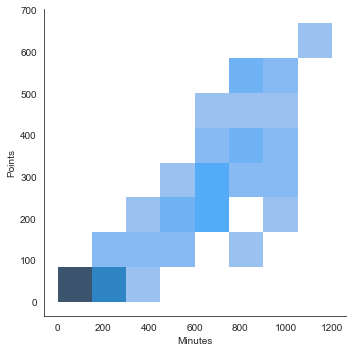

In [17]:
sns.displot(x='Minutes', y='Points', data=df);

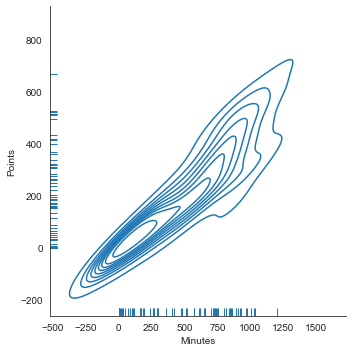

In [19]:
sns.displot(x='Minutes', y='Points', data=df, kind='kde', rug=True);

## Small Multiples (FacetGrid)

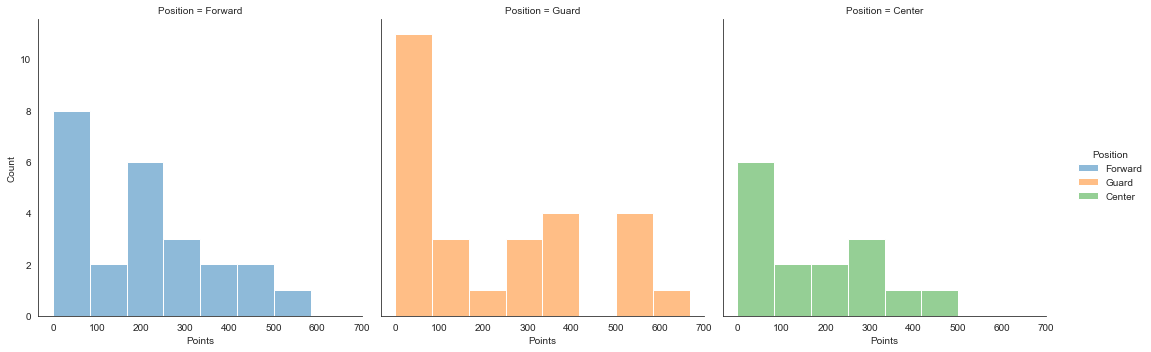

In [20]:
sns.displot(x='Points', data=df, hue='Position', col='Position');

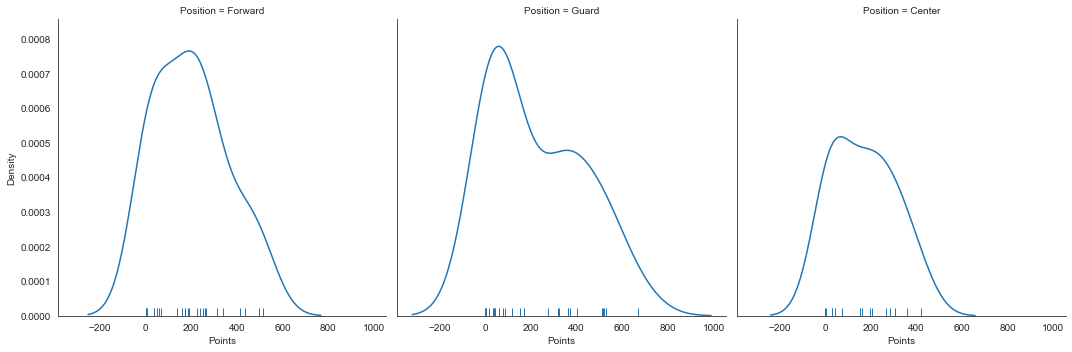

In [21]:
sns.displot(x='Points', data=df, col='Position', kind='kde', rug=True);

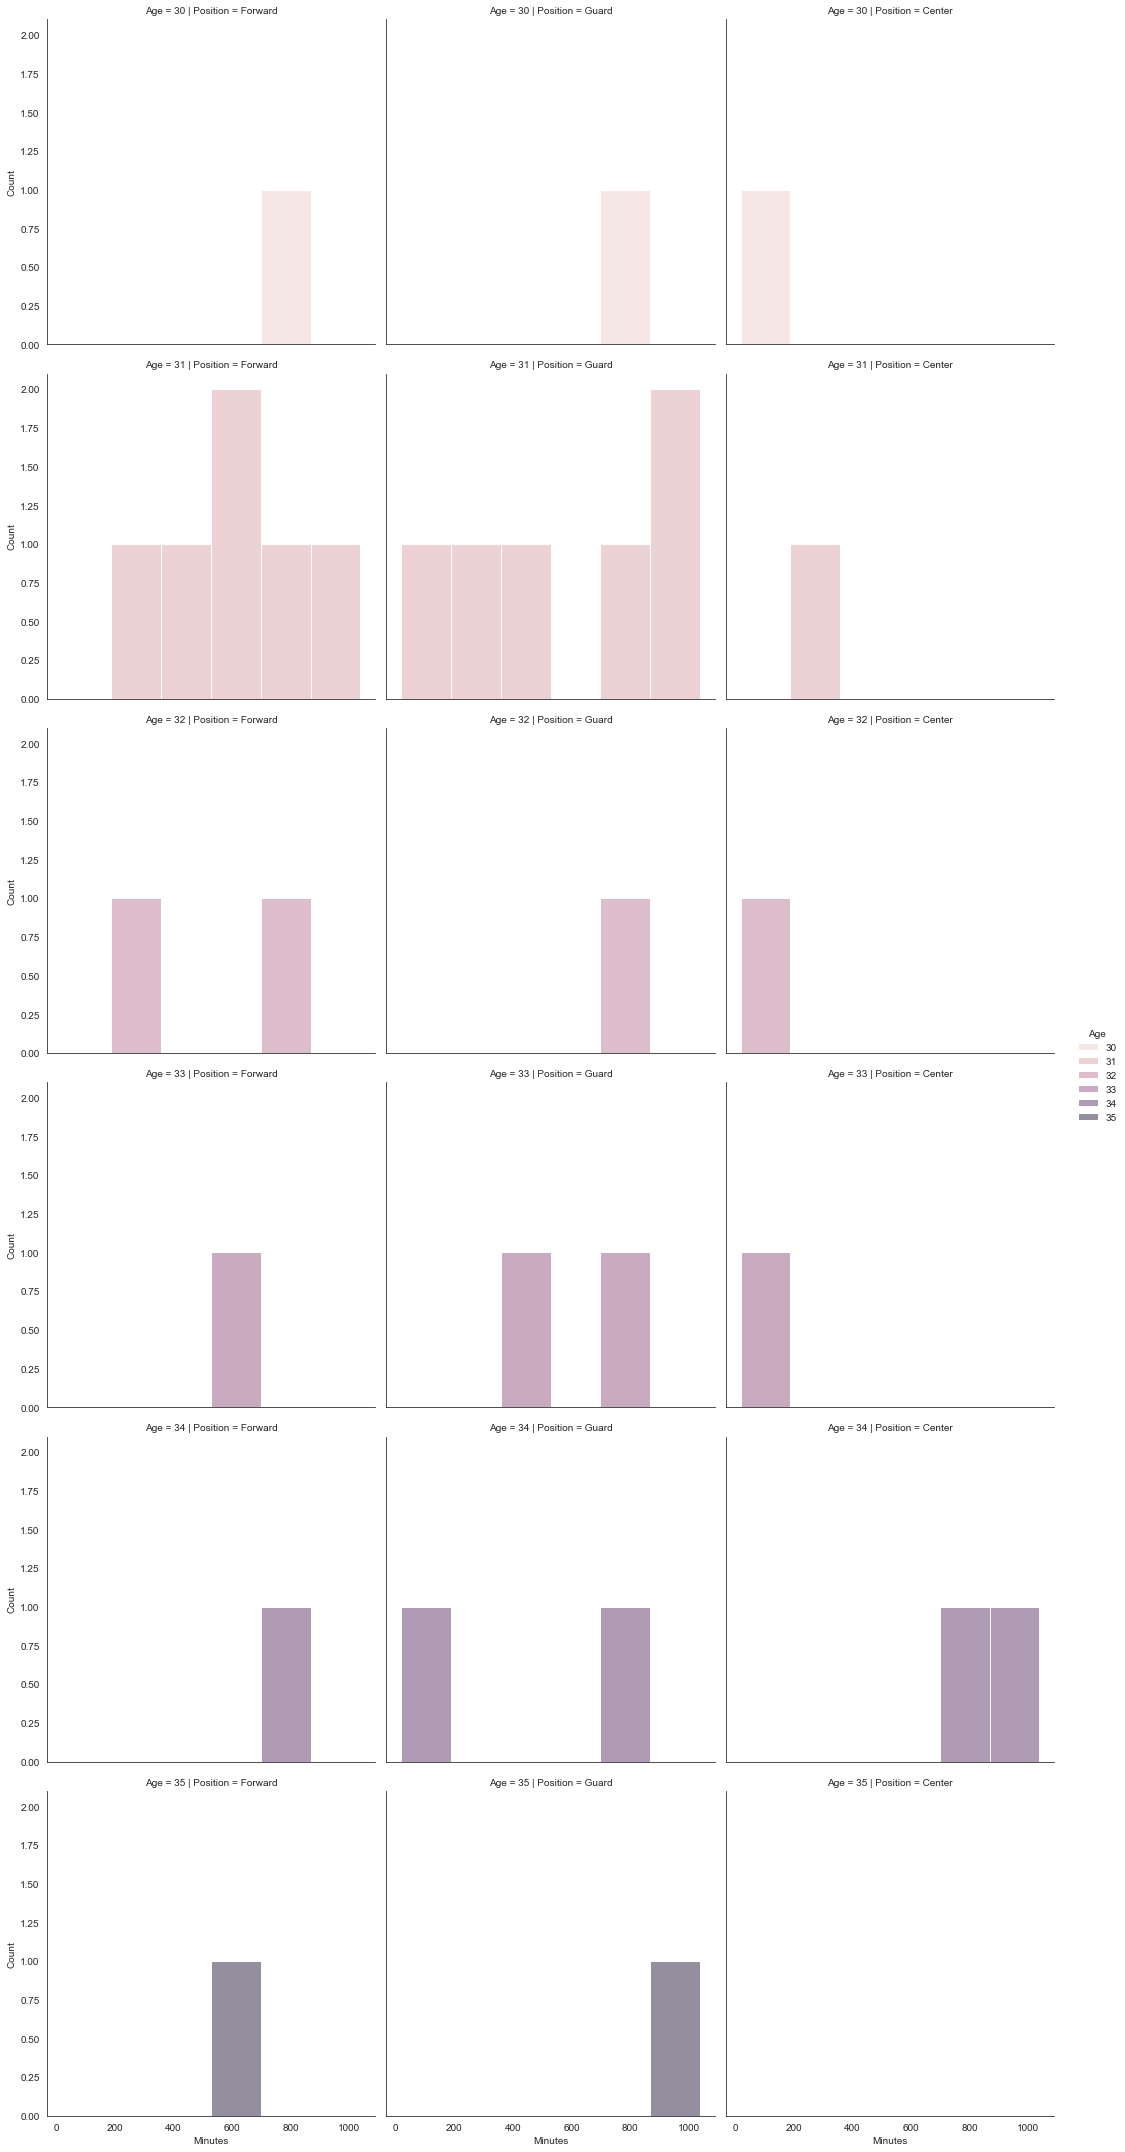

In [23]:
sns.displot(x='Minutes', data=df[df.Age.isin([30,31,32,33,34,35])], 
            col='Position', 
            row='Age', 
            hue='Age'
           );

## Styling

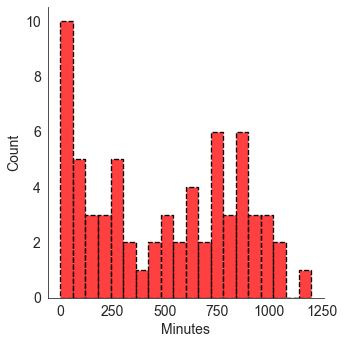

In [52]:
sns.displot(data = df, x = 'Minutes', bins=20, kde=False,
            color='red', edgecolor='black', lw=4, ls='--');

# lw = linewidth, ls = linestyle

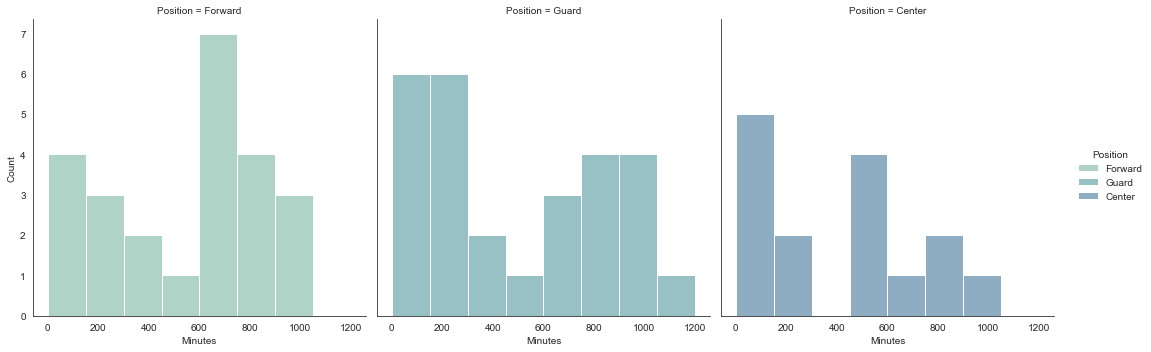

In [25]:
sns.displot(x='Minutes', data=df, hue='Position', col='Position', palette='crest');

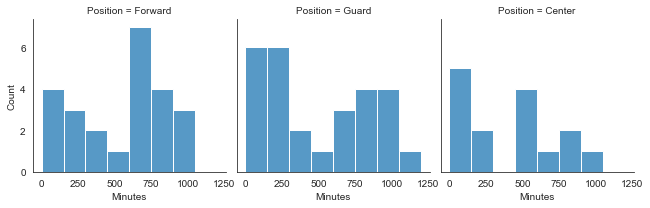

In [26]:
# height

sns.displot(x='Minutes', data=df, col='Position', height=3);

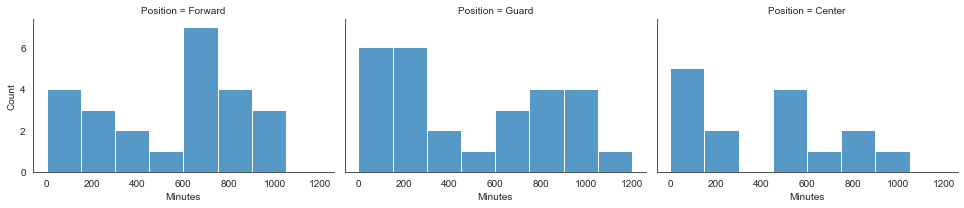

In [27]:
# aspect

sns.displot(x='Minutes', data=df, col='Position', height=3, aspect=1.5);

## Other Keywords: Plot Specific

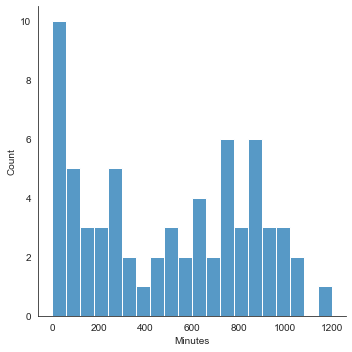

In [29]:
sns.displot(x='Minutes', data=df, bins=20);

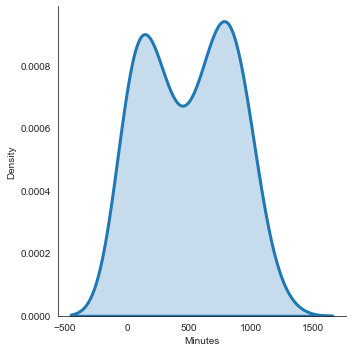

In [30]:
sns.displot(x='Minutes', data=df, kind='kde', fill=True, lw=3);

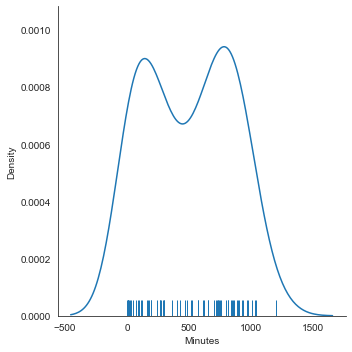

In [31]:
sns.displot(x='Minutes', data=df, kind='kde', rug=True, rug_kws={'height': 0.05});

## FacetGrid Styling

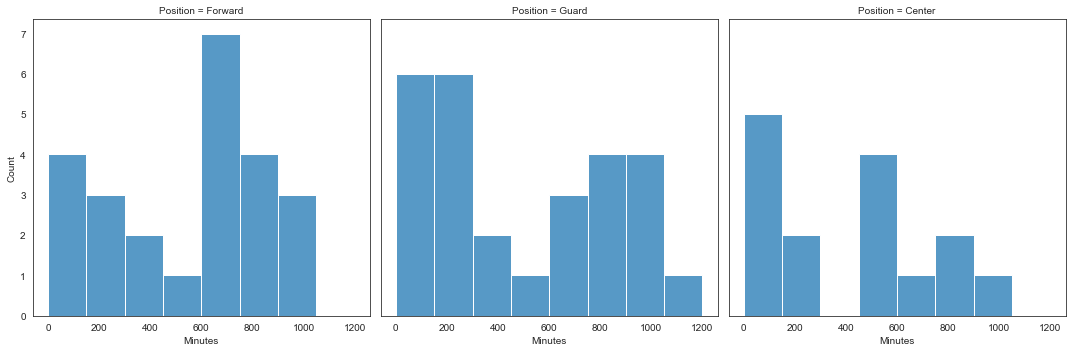

In [32]:
sns.displot(x='Minutes', data=df, col='Position', facet_kws={'despine': False});

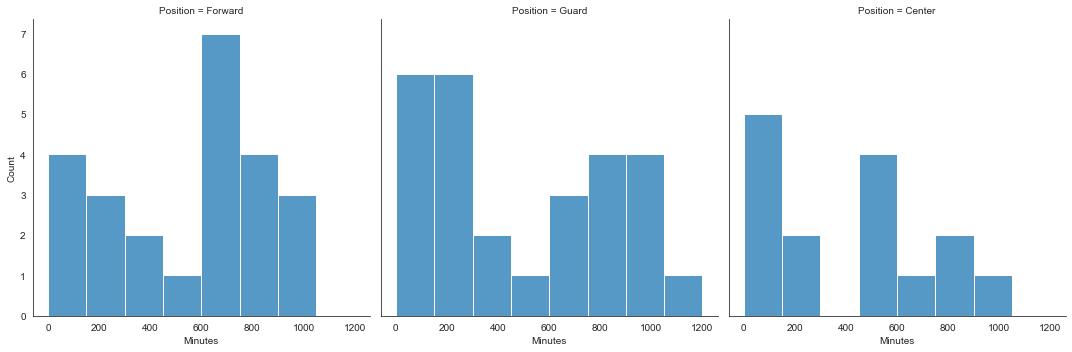

In [33]:
g = sns.displot(x='Minutes', data=df, col='Position');

In [34]:
type(g)

seaborn.axisgrid.FacetGrid

In [35]:
g.axes_dict.items()

dict_items([('Forward', <AxesSubplot:title={'center':'Position = Forward'}, xlabel='Minutes', ylabel='Count'>), ('Guard', <AxesSubplot:title={'center':'Position = Guard'}, xlabel='Minutes'>), ('Center', <AxesSubplot:title={'center':'Position = Center'}, xlabel='Minutes'>)])

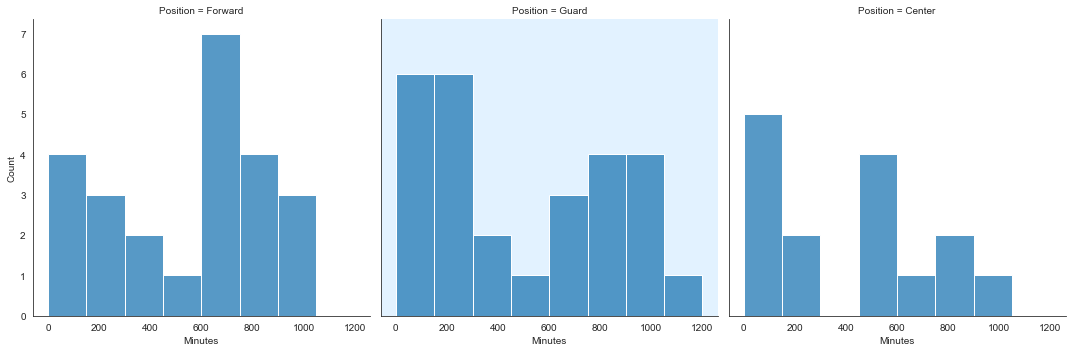

In [36]:
g = sns.displot(x='Minutes', data=df, col='Position')

for col_val, ax in g.axes_dict.items():
    if col_val == "Guard":
        ax.set_facecolor("#E2F2FF")

## Examples

In [37]:
plt.rcParams['font.size'] = 14

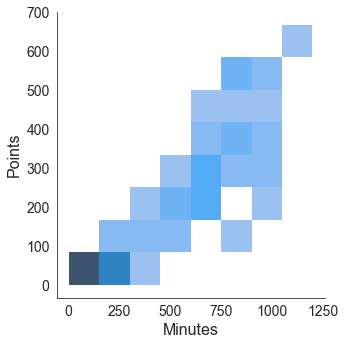

In [39]:
sns.displot(x='Minutes', y='Points', data=df)
plt.xlabel('Minutes', fontsize=16)
plt.ylabel('Points', fontsize=16);

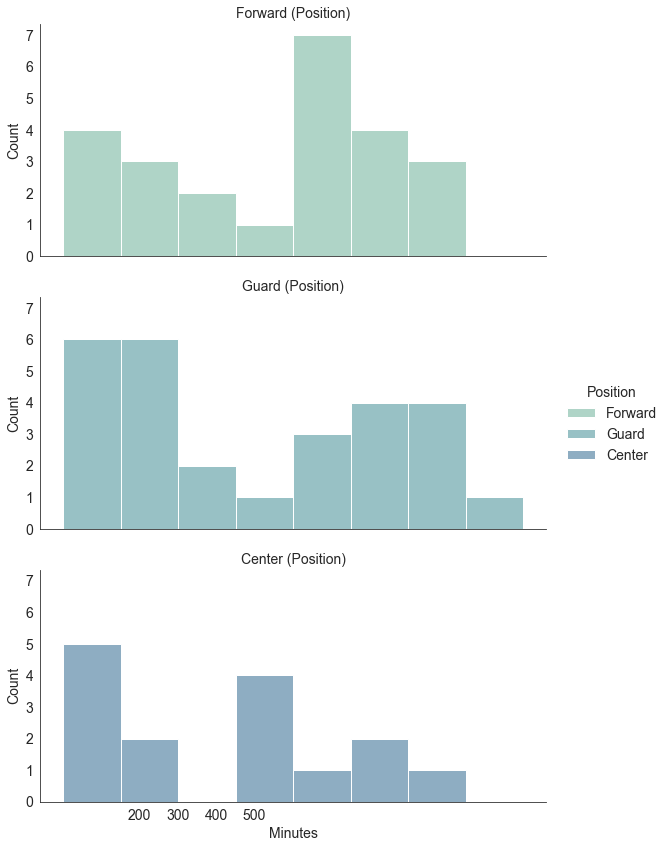

In [43]:
g = sns.displot(x='Minutes', row='Position', hue='Position', palette='crest', data=df, height=4, aspect=2)

g.set_titles(row_template='{row_name} (Position)')

plt.xlabel("Minutes")
plt.xticks([200, 300, 400, 500]);

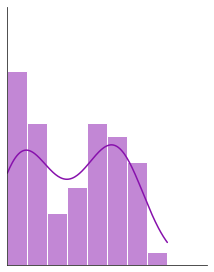

In [49]:
g = sns.displot(x='Minutes', color='#8711ac', data=df, height=4, aspect=0.8, kde=True)

g.set_titles(col_template='')
g.set_xlabels('')
g.set_ylabels('')
g.set_xticklabels([])
g.set_yticklabels([])
plt.xlim(0, 1500)
plt.ylim(0, 20)
plt.tight_layout();

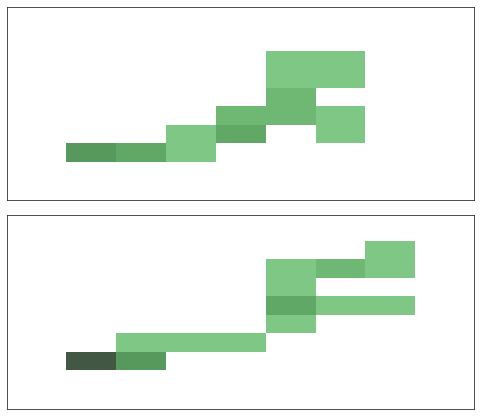

In [50]:
g = sns.displot(x='Minutes', y='Points', row='Position', color='#48804D',
                data=df[df.Position.isin(['Forward','Guard'])], 
                height=3, aspect=2.3, row_order=['Forward', 'Guard'],
                facet_kws={'despine': False})

g.set_titles(row_template='')
g.set_xlabels('')
g.set_ylabels('')
g.set_xticklabels([])
g.set_yticklabels([])
plt.tight_layout();